### REPAYING  THE  CREDIT

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import seaborn as sb

In [2]:
# Check for the version of the libraries 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.4.2
Seaborn version:  0.11.2
Matplotlib version:  3.5.1


In [3]:
df = pd.read_csv("Gold_Atlantis.csv")

## Level 0 analysis

In [4]:
df.head(3) # head prints the top 3 rows 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0


In [5]:
df.tail(3) # tail returns the bottom 3 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [6]:
print(df.shape) #returns a tuple of number of rows and columns 

(100000, 24)


In [7]:
print(df.columns) # returns array of columns in dataset 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [8]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [9]:
df.isnull().sum()  

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types

### Following are the kinds of analysis that can be performed on categorical data:
1. Check if the variable is  Nominal or Ordinal.
2. Check how many categories are present in a variable.
3. Check the Mode of a variable.
4. Check for Missing values of a variable.
5. Think how the missing values could be treated.
6. What kind of graph/chart can be plotted using this data.

Note: We are analyzing only one column at a time (a.k.a. Univariate Analysis)

In [10]:
a = df.select_dtypes(exclude='object')

In [11]:
b = df.select_dtypes(include='object')

In [12]:
a.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
0,100002,1,0,202500.0,406597.5,351000.0,-637,1,1,0,1,0,1.0,1
1,100003,0,0,270000.0,1293502.5,1129500.0,-1188,1,1,0,1,0,2.0,1
2,100004,0,0,67500.0,135000.0,135000.0,-225,1,1,1,1,0,1.0,0


In [13]:
b.head(3)

,NAME_CONTRACT_TYPE,GENDER,Car,House,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,APPLICATION_DAY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,WEDNESDAY
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,Core staff,MONDAY
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,MONDAY


In [14]:
a_lst=list(a.columns)
b_lst=list(b.columns)

table = [b_lst, a_lst]

print(tabulate({"Categorical":b_lst,
                "continuous": a_lst}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User defined functions for level 1 analysis of categorical columns
This function will check for the following:


- unique values 
- mode 
- sum of all the null values 
- Total count of missing values

In [16]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [17]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [19]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [20]:
info_of_cat("NAME_TYPE_SUITE") 

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405

There are null values in the NAME_TYPE_SUITE column


In [21]:
bt_mode = df["NAME_TYPE_SUITE"].mode()[0]
print(bt_mode)
df["NAME_TYPE_SUITE"].fillna(bt_mode, inplace = True, axis = 0)

Unaccompanied


In [22]:
df.isnull().sum()  

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [23]:
info_of_cat("OCCUPATION_TYPE") 

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


In [24]:
occupation_mode = df["OCCUPATION_TYPE"].mode()[0]
print(occupation_mode)
df["OCCUPATION_TYPE"].fillna(occupation_mode, inplace = True, axis = 0)

Laborers


In [25]:
df.isnull().sum()  

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
GENDER                  0
Car                     0
House                   0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_GOODS_PRICE        81
NAME_TYPE_SUITE         0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
DAYS_EMPLOYED           0
MOBILE                  0
WORK_PHONE              0
HOME_PHONE              0
MOBILE_REACHABLE        0
FLAG_EMAIL              0
OCCUPATION_TYPE         0
CNT_FAM_MEMBERS         1
APPLICATION_DAY         0
TOTAL_DOC_SUBMITTED     0
dtype: int64

In [26]:
info_of_numerical("AMT_GOODS_PRICE")  #on which the loan is given

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 81


In [27]:
median_amt_Goods_price = 450000.0
df["AMT_GOODS_PRICE"].fillna(median_amt_Goods_price, axis = 0, inplace = True)

In [28]:
df.isnull().sum() 

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        1
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [29]:
info_of_numerical("CNT_FAM_MEMBERS")

The mean of the CNT_FAM_MEMBERS is 2.1556715567155673
The median of the CNT_FAM_MEMBERS is 2.0
The mode of the CNT_FAM_MEMBERS is 2.0
The standard deviation of the CNT_FAM_MEMBERS is 0.9088966556371371
Number of missing values in the CNT_FAM_MEMBERS is 1


In [30]:
df['CNT_FAM_MEMBERS'].describe()

count    99999.000000
mean         2.155672
std          0.908897
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [31]:
mode_can_fam_members = 2.0
df["CNT_FAM_MEMBERS"].fillna(mode_can_fam_members, axis = 0, inplace = True)

In [32]:
df.isnull().sum()  # o null value present

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

### We completed treating null values

In [33]:
a_lst=list(a.columns)
b_lst=list(b.columns)

table = [b_lst, a_lst]

print(tabulate({"Categorical":b_lst,
                "continuous": a_lst}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [34]:
df['DAYS_EMPLOYED']= abs(df['DAYS_EMPLOYED'])  # used abs function to make positive value

# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis## Level 1 Analysis

# 1. Analysis of NAME_CONTRACT_TYPE:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis)

In [35]:
df['NAME_CONTRACT_TYPE'].describe() 

count         100000
unique             2
top       Cash loans
freq           90517
Name: NAME_CONTRACT_TYPE, dtype: object

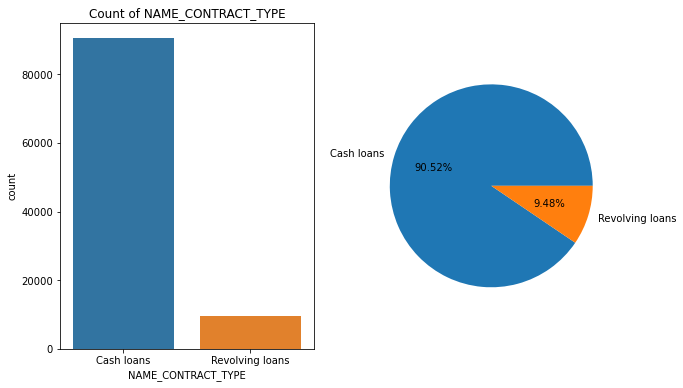

In [140]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))
ax[0].set_title("Count of NAME_CONTRACT_TYPE")                  # Set the title of the graph
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## Interpretation: We can observe that there is 90.52% of cash loans and 9.48 percentage of revolving loans. 

# 2. Analysis of  GENDER: 
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [37]:
df['GENDER'].describe() 

count     100000
unique         3
top            F
freq       65855
Name: GENDER, dtype: object

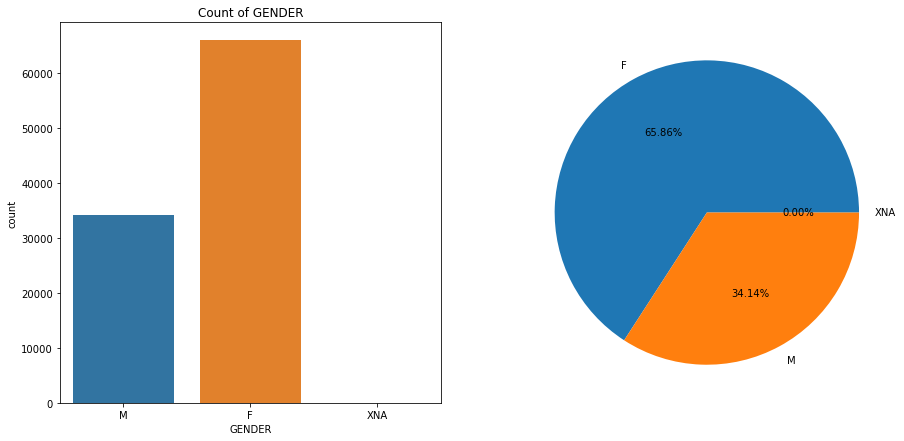

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of GENDER")                  # Set the title of the graph
percentage = df["GENDER"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["GENDER"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [39]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [40]:
df['GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [41]:
df['GENDER'].value_counts()

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64

In [42]:
df['GENDER']=df['GENDER'].replace(['XNA'],'F')

In [43]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

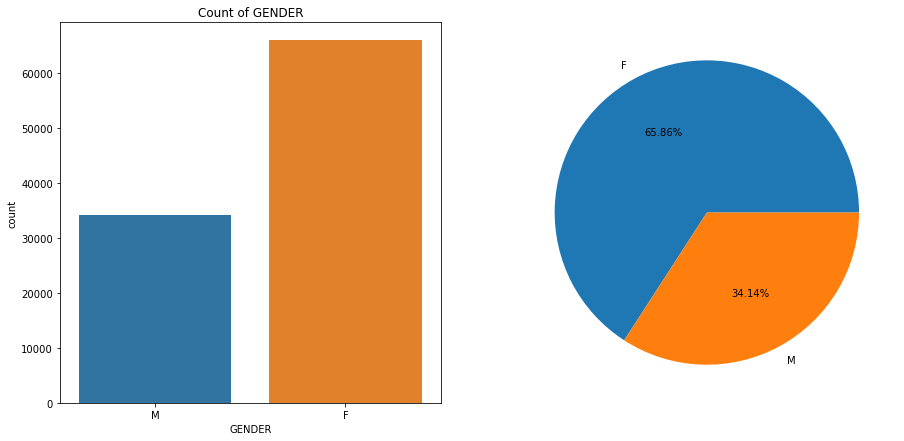

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of GENDER")                  # Set the title of the graph
percentage = df["GENDER"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["GENDER"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## Interpretation: We can observe that gender-wise femeal has maximum count and it acquires 65.86 % and male is 43.14%

# 3. Analysis of  OCCUPATION_TYPE: 
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [45]:
df['OCCUPATION_TYPE'].describe() 

count       100000
unique          18
top       Laborers
freq         49201
Name: OCCUPATION_TYPE, dtype: object

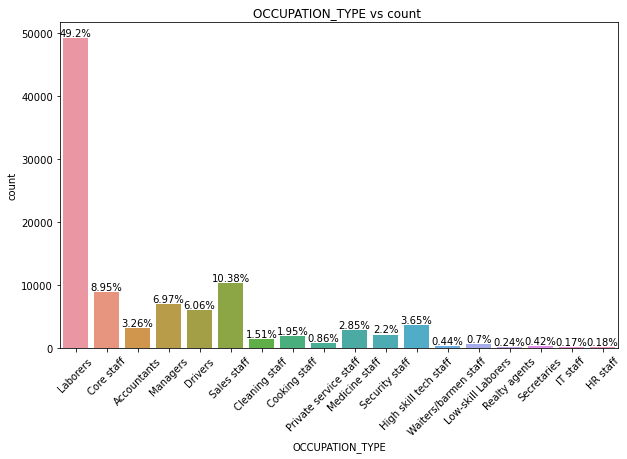

In [141]:
fig,ax=plt.subplots(1,figsize=(10,6));
plt.title('OCCUPATION_TYPE vs count ')
plt.xticks(rotation=45);
sns.countplot(x = df["OCCUPATION_TYPE"]);
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
plt.show()

## Interpretation: we can observe that the laborers,sales staff ,core staff are the people woh takes the loan maximum time 

# 3. Analysis of  AMT_INCOME_TOTAL: 
LEVEL 1 Analysis of continuous Data (Univariate Analysis) 

In [48]:
df['AMT_INCOME_TOTAL'].describe() 

count    1.000000e+05
mean     1.694261e+05
std      3.835007e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [49]:
info_of_numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


In [50]:
l13=df.groupby(by='AMT_INCOME_TOTAL')
l13

In [51]:
df['AMT_INCOME_TOTAL'].unique()

array([202500. , 270000. ,  67500. , ...,  73759.5, 133564.5, 225112.5])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

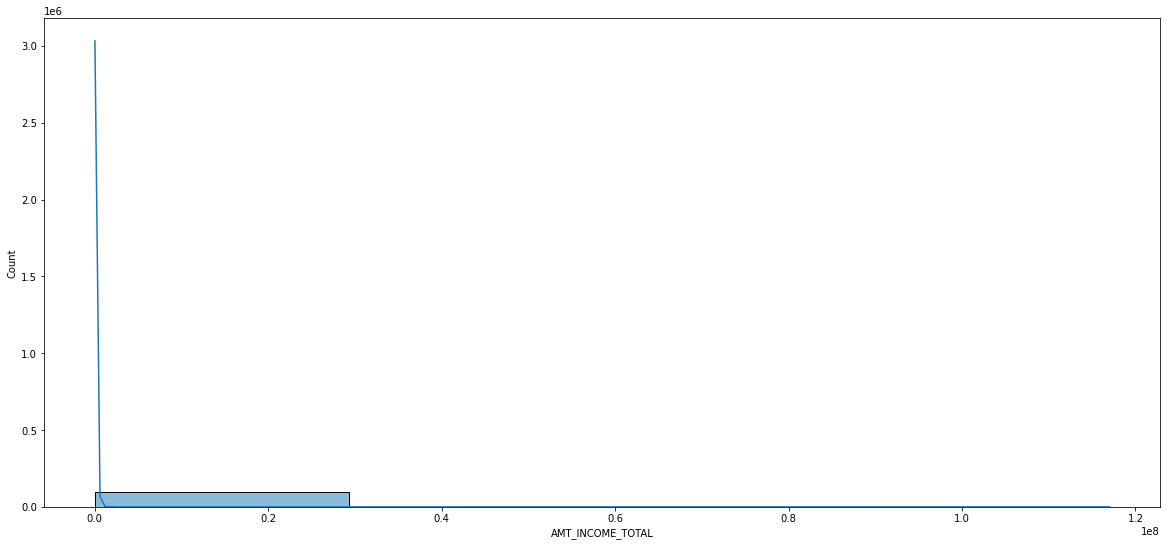

In [52]:
plt.figure(figsize=(20,9))
sb.histplot(x=df['AMT_INCOME_TOTAL'],kde=True,bins=4)

In [53]:
df[(df.AMT_INCOME_TOTAL>900000)]  # as there are only 89 value out of 100000

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1504,101769,0,Revolving loans,M,Y,Y,0,1080000.0,180000.0,180000.0,...,5536,1,1,0,1,0,Laborers,2.0,FRIDAY,0
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,269550.0,225000.0,...,365243,1,0,0,1,0,Laborers,2.0,MONDAY,1
3371,103938,0,Cash loans,F,N,N,1,1350000.0,2410380.0,2250000.0,...,843,1,1,0,1,0,Managers,3.0,SUNDAY,2
4603,105384,0,Revolving loans,F,Y,Y,0,1350000.0,405000.0,405000.0,...,4768,1,1,0,1,0,Managers,2.0,TUESDAY,0
5673,106637,0,Cash loans,M,Y,Y,3,967500.0,450000.0,450000.0,...,546,1,1,0,1,0,Managers,5.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95940,211386,0,Cash loans,F,Y,Y,2,1125000.0,900000.0,900000.0,...,2653,1,1,1,1,0,Managers,4.0,TUESDAY,1
96710,212267,0,Cash loans,M,Y,N,2,1125000.0,2330190.0,2250000.0,...,6083,1,1,0,1,0,Managers,4.0,MONDAY,2
97152,212783,0,Cash loans,M,N,N,0,990000.0,900000.0,900000.0,...,4314,1,1,0,1,0,Managers,2.0,SATURDAY,1
97169,212804,0,Cash loans,M,Y,N,0,1575000.0,276277.5,238500.0,...,365243,1,0,0,1,0,Laborers,2.0,TUESDAY,1


In [55]:
mean = int(df.AMT_INCOME_TOTAL.mean())
# accessing the data lesser than 20
x = df[df["AMT_INCOME_TOTAL"] > 900000].index
df.loc[x,"AMT_INCOME_TOTAL"] = mean  

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL vs count '}, xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

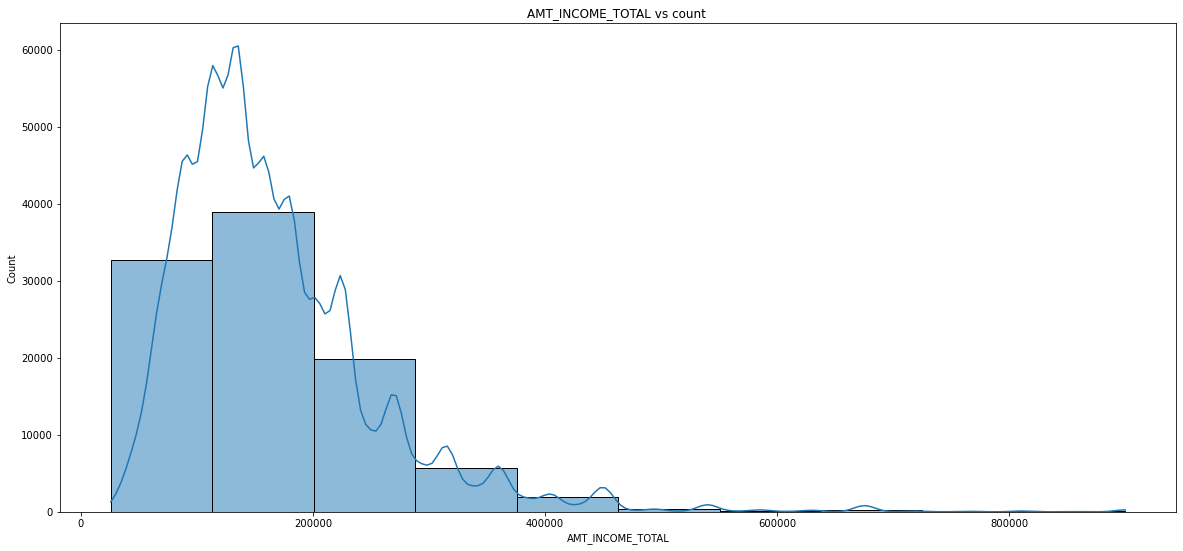

In [68]:
plt.figure(figsize=(20,9))
plt.title('AMT_INCOME_TOTAL vs count ')
sb.histplot(x=df['AMT_INCOME_TOTAL'],kde=True,bins=10)

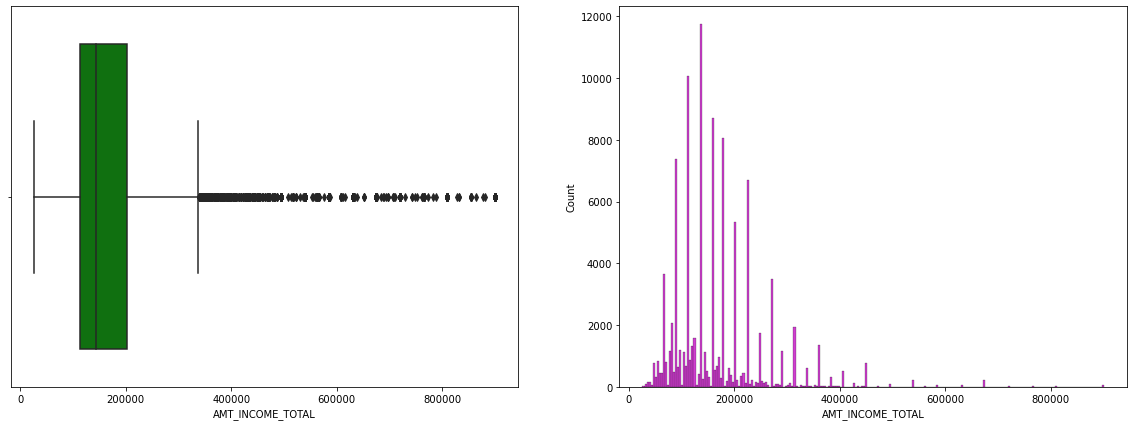

In [58]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## Interpretation: here we can say the data is right screwed and the main value lies upto 202500

# 4. Analysis of  TARGET: 
LEVEL 1 Analysis of continuous Data (Univariate Analysis) 

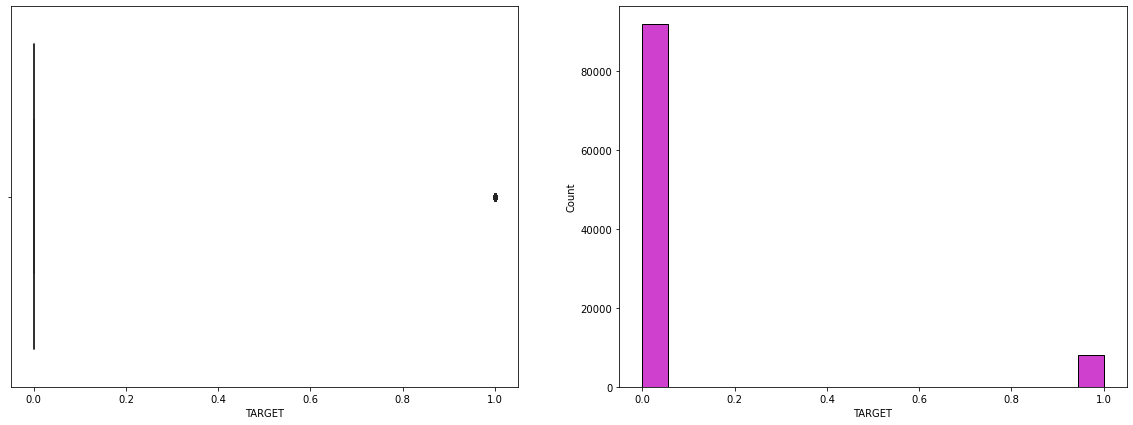

In [61]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["TARGET"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TARGET"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

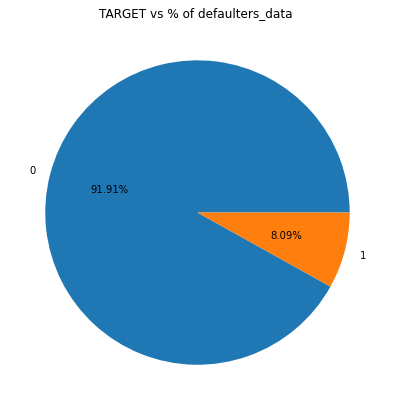

In [70]:
fig, ax = plt.subplots( figsize= (25, 7)) 
plt.title('TARGET vs % of defaulters_data ')
labels = list(df["TARGET"].value_counts().index)
percentage = df["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TARGET"].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") ; # autopct: to print the percentage on pie wedge. 2 decimal points used 


## Interpretation: we can observe that there on only 8.09% defaulters Client and 91.91% are NON defaulters Client.

# 5. Analysis of  DAYS_EMPLOYED: 
LEVEL 1 Analysis of continuous Data (Univariate Analysis) 

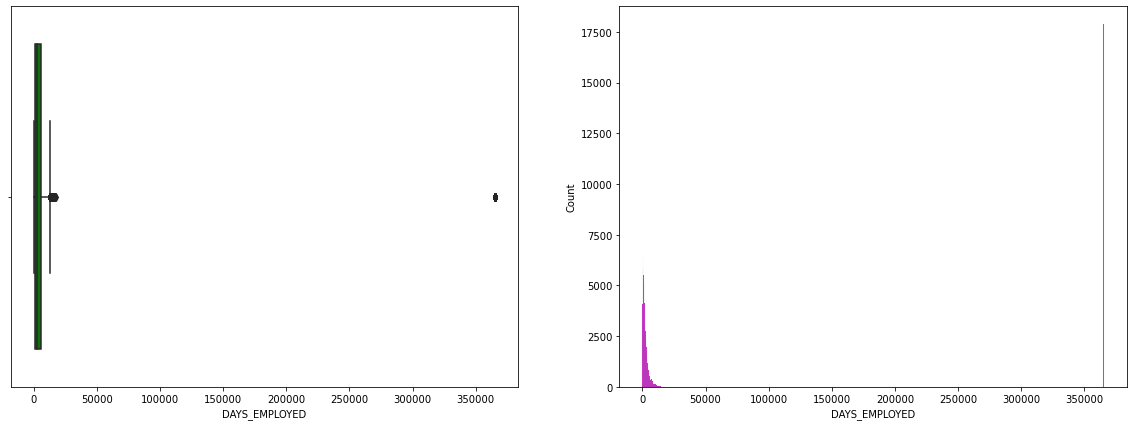

In [73]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [75]:
df[(df.DAYS_EMPLOYED>50000)]  # we can see that there is 365243 which is outlier rest all value is under 50000

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,...,365243,1,0,0,1,0,Laborers,2.0,WEDNESDAY,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,225000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,225000.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,675000.0,...,365243,1,0,0,1,0,Laborers,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,216037,0,Cash loans,F,N,N,0,103500.000,540000.0,540000.0,...,365243,1,0,0,1,0,Laborers,1.0,TUESDAY,1
99963,216053,0,Cash loans,F,Y,Y,0,67500.000,544491.0,454500.0,...,365243,1,0,0,1,0,Laborers,2.0,FRIDAY,1
99976,216067,0,Cash loans,M,Y,Y,0,180000.000,1002870.0,922500.0,...,365243,1,0,0,1,0,Laborers,2.0,MONDAY,1
99981,216072,0,Cash loans,F,N,Y,0,35100.000,294322.5,243000.0,...,365243,1,0,0,1,0,Laborers,2.0,SUNDAY,1


In [76]:
mean = int(df.DAYS_EMPLOYED.mean())
# accessing the data lesser than 20
x = df[df["DAYS_EMPLOYED"] > 50000].index
df.loc[x,"DAYS_EMPLOYED"] = mean  

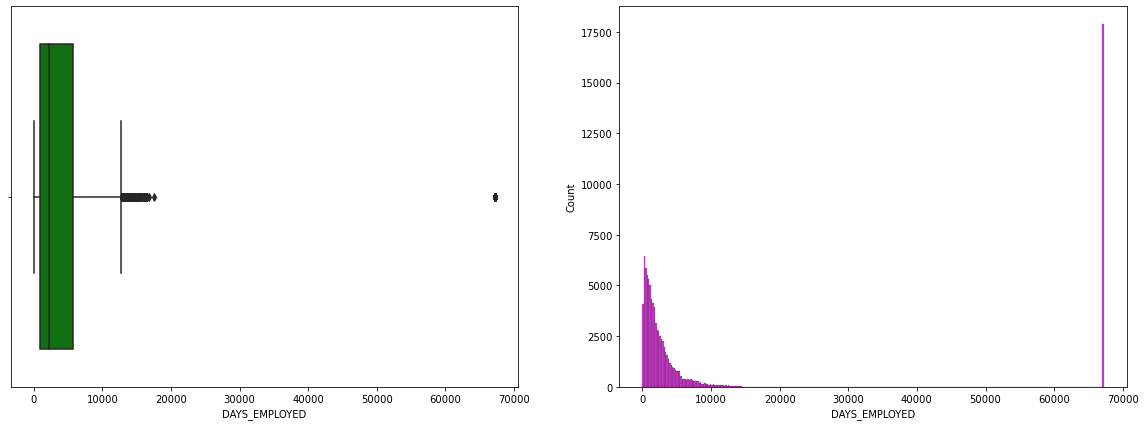

In [77]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

<AxesSubplot:title={'center':'DAYS_EMPLOYED Distribution '}, xlabel='DAYS_EMPLOYED', ylabel='Count'>

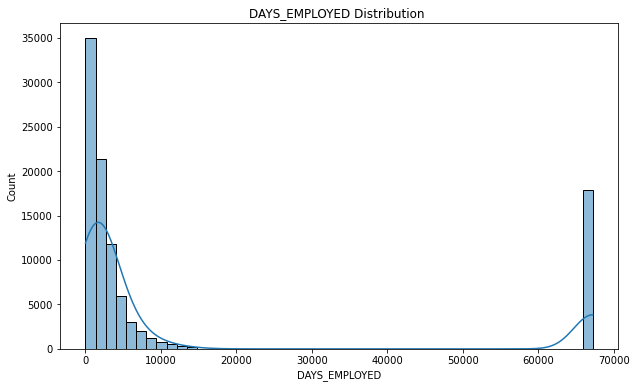

In [142]:
plt.figure(figsize=(10,6))
plt.title('DAYS_EMPLOYED Distribution ')
sb.histplot(x=df['DAYS_EMPLOYED'],kde=True,bins=50)

## Interpretation: we can observe that the client taking  a loan are averagely newly employed person.

Level 2 Analysis (Getting closer to the BIG QUESTION: Bank Data Analysis) 
---------------------------------------------------------------------------------------------------

How can this column make way to further analysis to answer the big question?

What other columns could be clubbed with Employee churn to ask further questions?

The below is the variables list of columns/features in the given data. 

## Bivariante Analysis of Categorical columns with respect to Target variable

#### CAT-CAT ANALYSIS  (relationship between categorical data)

## Q1.Show Distributionn of male and female on on defaulters and non defaulters?

In [95]:
defaulters_data =df[(df.TARGET == 1)]
defaulters_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,67209,1,0,0,1,0,Laborers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,586,1,1,0,1,0,Laborers,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,Laborers,2.0,SATURDAY,1


In [86]:
NA_defaulters_data =df[(df.TARGET == 0)]
NA_defaulters_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


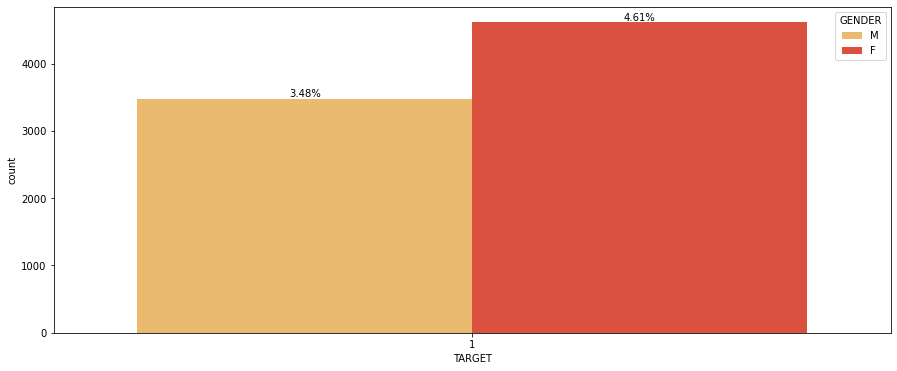

In [144]:
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.countplot(x='TARGET',hue='GENDER',data=defaulters_data , palette = 'YlOrRd')
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

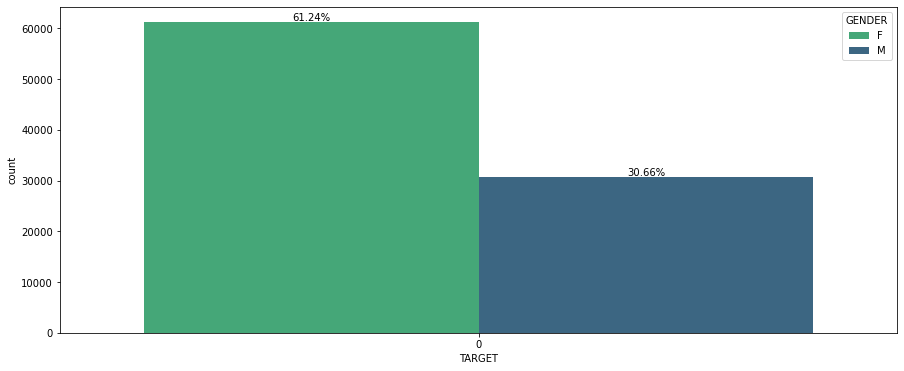

In [145]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.countplot(x='TARGET',hue='GENDER',data=NA_defaulters_data , palette = 'viridis_r')
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )


plt.show()

### Interpretation:
1. **The Female clients applied More than male clients for loan.**
2. **61.24 % Female clients are non-defaulters while 30.66 % male clients are non-defaulters.**
3. **4.61% Female clients are defaulters while 3.48% male clients are defaulters.**

In [ ]:
Q.analysis of the data on bases on OCCUPATION Type

Text(0.5, 1.0, 'OCCUPATION_TYPE Vs Target 0')

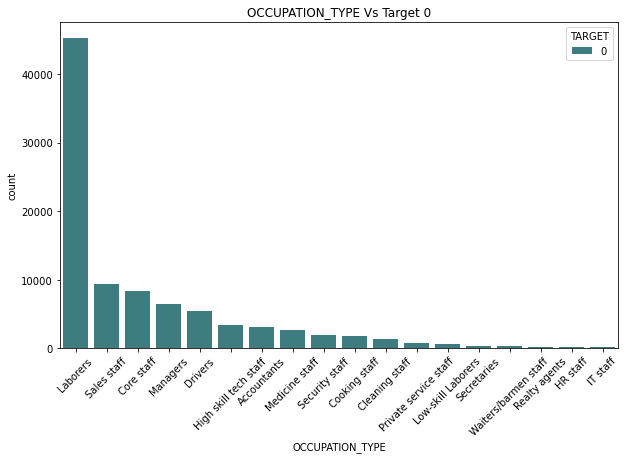

In [146]:
# For Target 0      
fig, ax = plt.subplots(figsize = (10,6))
plt.xticks(rotation=45);
sns.countplot(data=NA_defaulters_data,x='OCCUPATION_TYPE',
              order=NA_defaulters_data['OCCUPATION_TYPE'].value_counts().index,palette='crest_r',hue = 'TARGET')
plt.title("OCCUPATION_TYPE Vs Target 0")

Text(0.5, 1.0, 'OCCUPATION_TYPE Vs Target 1')

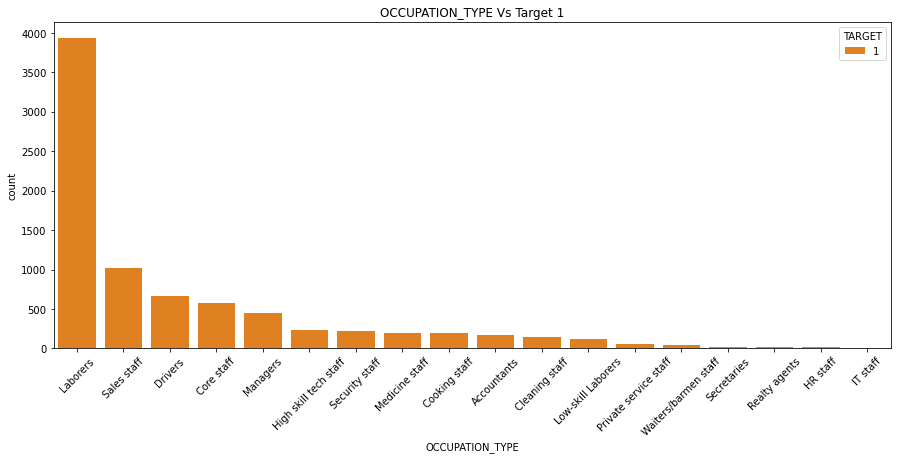

In [148]:
# For Target 1 
fig, ax = plt.subplots(figsize = (15,6))
plt.xticks(rotation=45);
sns.countplot(data=defaulters_data,x='OCCUPATION_TYPE',
              order=defaulters_data['OCCUPATION_TYPE'].value_counts().index,palette='afmhot',hue = 'TARGET')
plt.title("OCCUPATION_TYPE Vs Target 1")

### Interpretation:
1. ** we observed that maximum people applied for loan is laboures,sales staf,driver,core staff.**
2. ** we can observe that there are same no of people defaulters  non-defaulters.**


## bivariante Analysis of Numerical columns with respect to Target variable

## Level 2 Continuous to Continuous

## Q.Analysis of Income of the client on defaulters and non defaulters.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

<AxesSubplot:title={'center':'defaulters data vs AMT_INCOME_TOTAL'}, xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

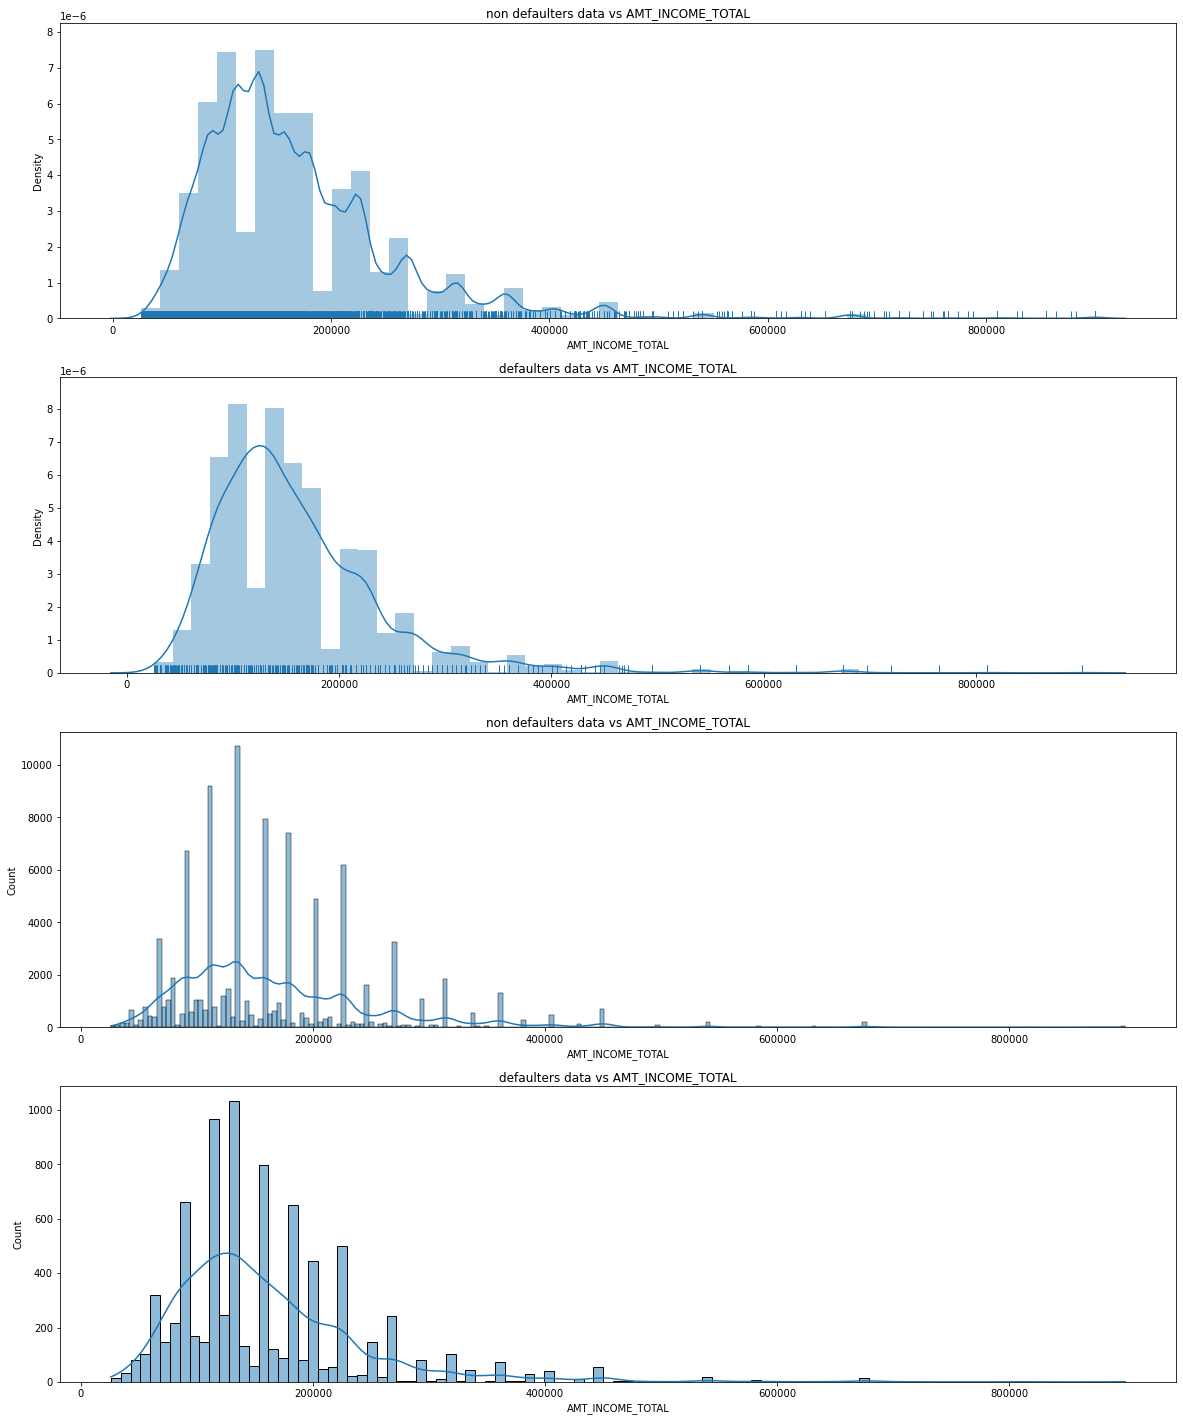

In [101]:
plt.figure(figsize=(20,25))
plt.subplot(411)
                   
plt.title('non defaulters data vs AMT_INCOME_TOTAL')
sns.distplot(NA_defaulters_data['AMT_INCOME_TOTAL'], rug=True, hist=True)
plt.subplot(412)

plt.title('defaulters data vs AMT_INCOME_TOTAL')
sns.distplot(defaulters_data['AMT_INCOME_TOTAL'], rug=True, hist=True)
plt.subplot(413)

plt.title('non defaulters data vs AMT_INCOME_TOTAL')
sns.histplot(NA_defaulters_data['AMT_INCOME_TOTAL'], kde=True)
plt.subplot(414)

plt.title('defaulters data vs AMT_INCOME_TOTAL')
sns.histplot(defaulters_data['AMT_INCOME_TOTAL'], kde=True)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

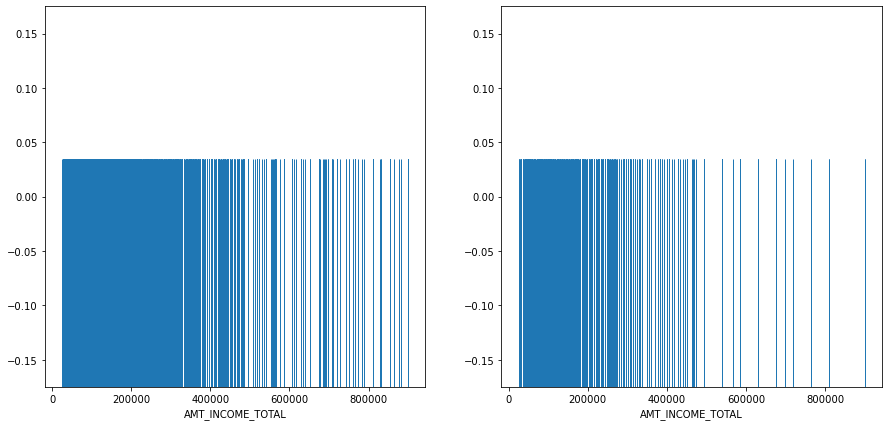

In [152]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.rugplot(NA_defaulters_data['AMT_INCOME_TOTAL'],height=0.6,ax=ax[0])
sns.rugplot(defaulters_data['AMT_INCOME_TOTAL'],height=0.6,ax=ax[1])


### Interpretation:
People with Defaulters has largely staggered income as compared to NON defaulters.

### Level 2 Categorical to Continuous

CAT-NUM ANALYSIS (relationship between categorical and numerical data) 
-----------------------------------------------------------------------------------------------------------

In [105]:
a_lst=list(a.columns)
b_lst=list(b.columns)

table = [b_lst, a_lst]

print(tabulate({"Categorical":b_lst,
                "continuous": a_lst}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


## Q.analysis of the client having car and are defaulters or not?

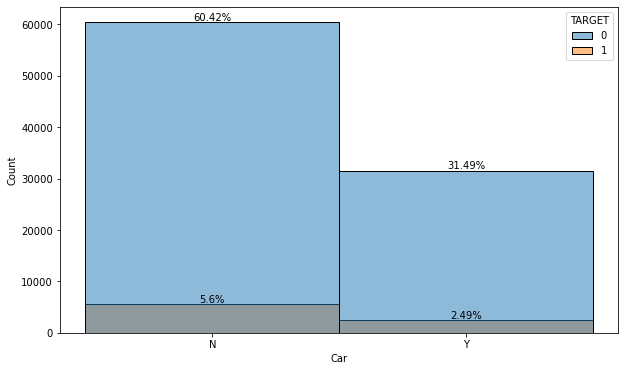

In [111]:
fig, ax = plt.subplots( figsize = (10, 6))
sns.histplot(x = df["Car"], hue = df["TARGET"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
plt.show()


### Interpretation:
we can observe that person having car are having more difficultes in paying loans.

## Q.analysis of the customer who has there own house and chect there target.

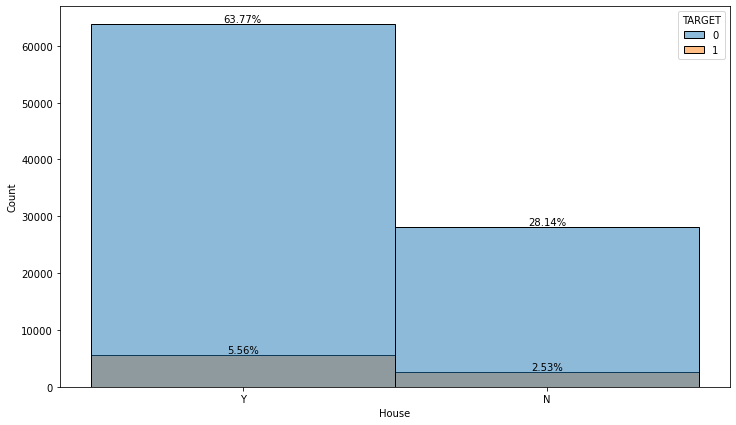

In [156]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.histplot(x = df["House"], hue = df["TARGET"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
plt.show()


### Interpretation:
the client having a home does not affect on there loan repaying process. because we can observe there have nearly same ratio.

## Q.analysis of the on the bases of Education type.

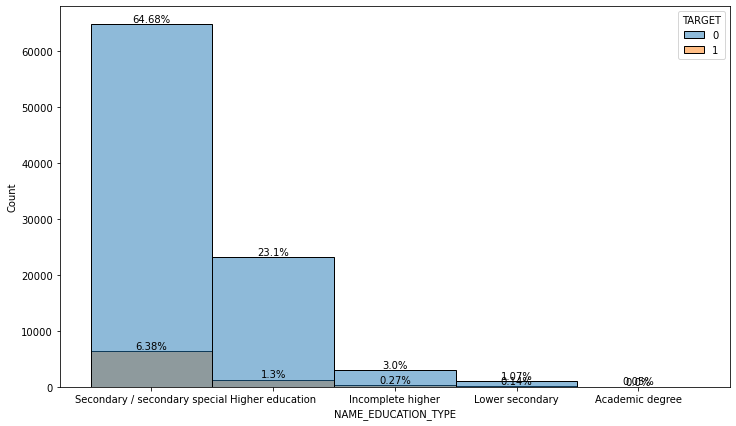

In [155]:
fig, ax = plt.subplots(figsize = (12,7))
sns.histplot(x = df["NAME_EDUCATION_TYPE"], hue = df["TARGET"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
plt.show()


### Interpretation:
we can observe the that people from acedemic degree are very less in count.
we can see that client having higher education are having more difficult in paying loan amount,on second the client who incomplete education.
the bank should be strick to higher education and incomplete education Client.

## Further Analysis (Level 3):
Let's look into the data to check if there is an additional information about the employees attrition who are males.

## Q.Analysis of the education and there total income also consider the family status.

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

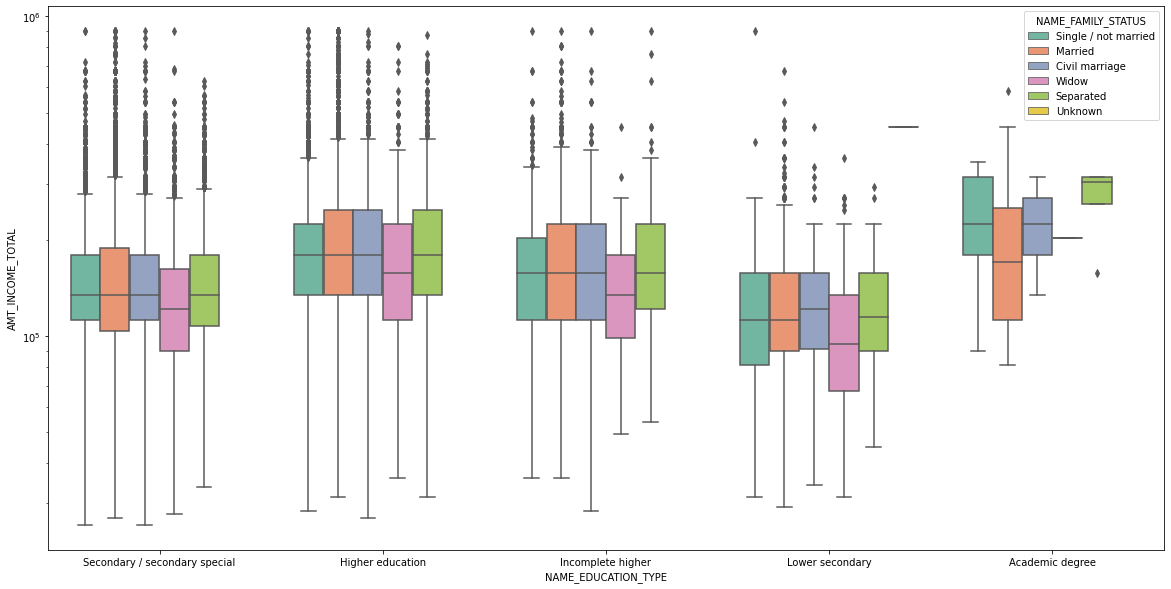

In [157]:
plt.figure(figsize=(20,10)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 0)
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',palette='Set2')

### Interpretation:
1. **Clients having Higher Education, Incomplete Higher Education,Secondary/Secondary Special have a higher number of outliers.
2. **widow are having less total income also they have less outlier

## Q.Show the co-relation between all the continuous data present?

<AxesSubplot:>

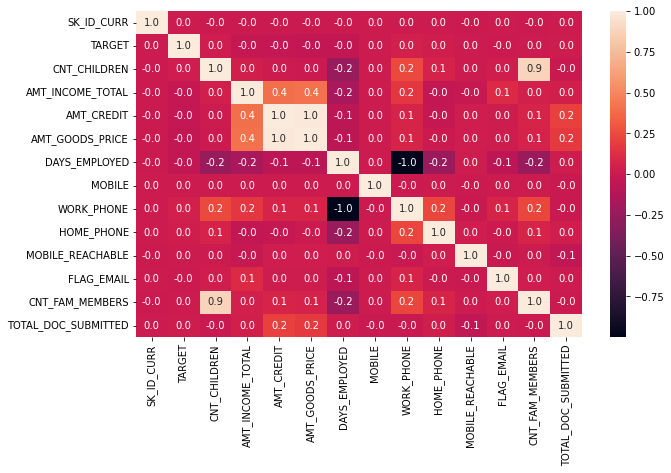

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df,annot=True,fmt='.1f',cbar=True)

### Interpretation:
1. **there are very few column who has some corelation between them as we observe in heatmap.

## Q. Analizer the data of Defaulters and non Defaulters on amount credit to amount of goods they keep with bank?

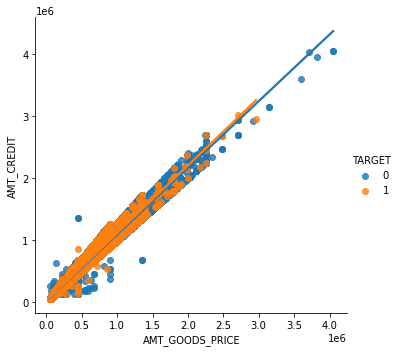

In [120]:
sb.lmplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',hue='TARGET',data=df)

### Interpretation:
1. **we found no relation between the amount credit and good price amount.we can also observe the same things in heatmap.

## Q.how the document submited by the people effect the Defaulters value.

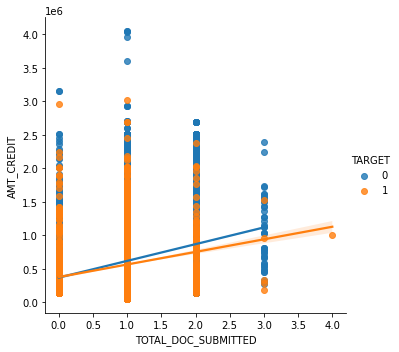

In [121]:
sb.lmplot(x='TOTAL_DOC_SUBMITTED',y='AMT_CREDIT',hue='TARGET',data=df)

### Interpretation:
1. we observe that the Defaulters client submit the more documents and having less amount CREDIT. 
2. bank should avoide the coustomer less document and high credit amount.

## Q. analysis on the name contract type, gender also include target

In [131]:
gb=df.groupby(by=['NAME_CONTRACT_TYPE','GENDER','TARGET'])['GENDER'].count()
gb

NAME_CONTRACT_TYPE  GENDER  TARGET
Cash loans          F       0         55215
                            1          4263
                    M       0         27740
                            1          3299
Revolving loans     F       0          6028
                            1           352
                    M       0          2924
                            1           179
Name: GENDER, dtype: int64

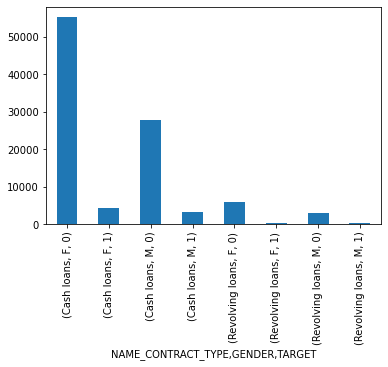

In [137]:
gb.plot.bar();

### Interpretation:
1. Female having cash loans are more in number in having problem in paying loan.

### The End